# Comparing Euphonic and OClimax

In [11]:
# Ignore errors resulting from matplotlib's fig.show(). This causes
# a warning when run from a notebook, but is still required if the
# scripts are run from the CL
import warnings
warnings.simplefilter("ignore", UserWarning)

## S(Q,w) Comparison

Its not currently possible to get the mode-resolved structure factors from OClimax for crystals, so OClimax can only be used to compare the binned S(Q,w) data

### Comparison Scripts

The `compare_sqw` script can read S(Q,w) from both Euphonic `Spectrum2D` objects in a `.json` file, and OClimax S(Q,w) written to a `.csv` file. It also calculates the mean, min and max absolute/relative errors, after applying a scaling factor. See the script for details.

These scripts can be run for all the cuts for different materials to give an idea of how well they compare to experimental data.

### By eye comparison

By just looking at the S(Q,w) plots produced by OClimax and Euphonic they are similar, they show the same patterns of intensity. However, looking more closely at the individual pixels it's clear that they are not being binned in same way, this is particularly obvious on the coarser cuts quartz_30L and lzo_hh2. This will be investigated further in the numerical comparisons.

**Quartz 2ph_m4_0**
![quartz_2ph_m4_0L](images/quartz_2ph_m4_0.PNG)

**Quartz 30L**
![quartz_30L](images/quartz_30L.PNG)

**LZO kagome**
![lzo_kagome](images/lzo_kagome.PNG)

**LZO hh2**
![lzo_hh2](images/lzo_hh2.PNG)


### Comparing with eigenvalues/vectors read from .phonon

Lets start with comparing the OClimax S(Q,w) with Euphonic's S(Q,w) that has been calculated with frequencies/eigenvectors read from a `.phonon` file:

In [2]:
from compare_sf import main as compare_sf_main
from compare_sqw import main as compare_sqw_main


quartz_cuts = ['2ph_m4_0_qe', '30L_qe']
for cut in quartz_cuts:
    compare_sqw_main(['--sqw1', '../../quartz/' + cut + '/oclimax/sqw_euphonic_ph_5K.json',
                      '--sqw2', '../../quartz/' + cut + '/oclimax/quartz_2Dmesh_scqw_5K.csv',
                      '-n', '5', '--mask-bragg'])

lzo_cuts = ['kagome_qe', 'hh2_qe']
for cut in lzo_cuts:
    compare_sqw_main(['--sqw1', '../../lzo/' + cut + '/oclimax/sqw_euphonic_ph_300K.json',
                      '--sqw2', '../../lzo/' + cut + '/oclimax/La2Zr2O7_2Dmesh_scqw_300K.csv',
                      '-n', '5', '--mask-bragg'])


Results for ../../quartz/2ph_m4_0_qe/oclimax/sqw_euphonic_ph_5K.json ../../quartz/2ph_m4_0_qe/oclimax/quartz_2Dmesh_scqw_5K.csv
Absolute Error - mean: 1.698537991281733e-10 max: 1.0329874783570165e-08 min: 7.619248963537258e-16
Relative Error - mean: 0.3566799451751697 max: 0.9968730936216005 min: 0.00015318725960789992
Points with largest mean relative error: (array([  6,  30,   3,   5, 121]), array([41, 41, 45, 55,  5]))

Results for ../../quartz/30L_qe/oclimax/sqw_euphonic_ph_5K.json ../../quartz/30L_qe/oclimax/quartz_2Dmesh_scqw_5K.csv
Absolute Error - mean: 3.5102725599264874e-10 max: 2.188652514870374e-08 min: 3.409963803313211e-15
Relative Error - mean: 0.6092936533026317 max: 1.635685835084995 min: 0.0010033489519177933
Points with largest mean relative error: (array([34, 27, 28, 29, 30]), array([103,  84,  86,  89,  92]))

Results for ../../lzo/kagome_qe/oclimax/sqw_euphonic_ph_300K.json ../../lzo/kagome_qe/oclimax/La2Zr2O7_2Dmesh_scqw_300K.csv
Absolute Error - mean: 8.924218

These mean errors are extremely large, lets look at a few points in the Quartz `30L_qe` cut with high errors


Results for ../../quartz/30L_qe/oclimax/sqw_euphonic_ph_5K.json ../../quartz/30L_qe/oclimax/quartz_2Dmesh_scqw_5K.csv
Absolute Error - mean: 3.5102725599264874e-10 max: 2.188652514870374e-08 min: 3.409963803313211e-15
Relative Error - mean: 0.6092936533026317 max: 1.635685835084995 min: 0.0010033489519177933


<IPython.core.display.Javascript object>


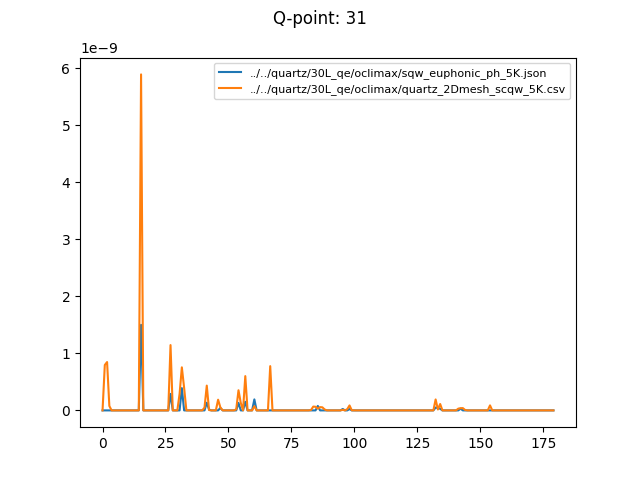

<IPython.core.display.Javascript object>


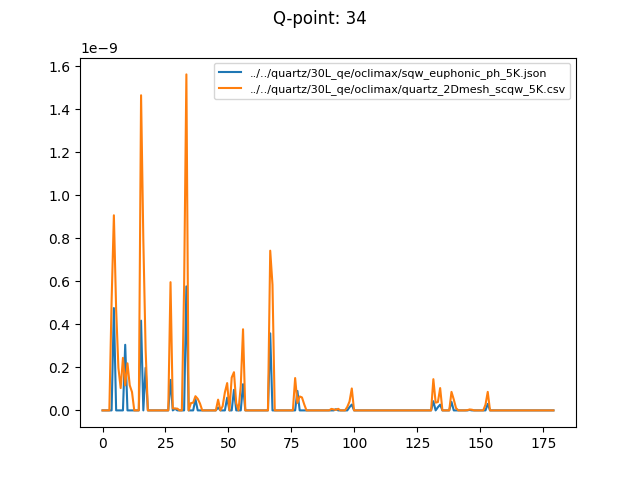

<IPython.core.display.Javascript object>


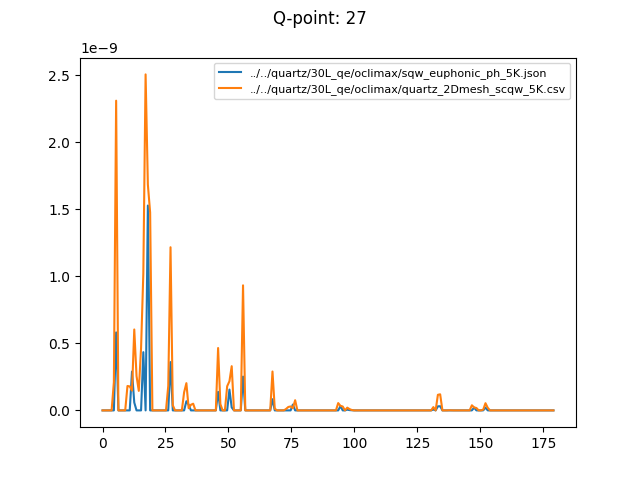

In [4]:
%matplotlib notebook
compare_sqw_main(['--sqw1', '../../quartz/30L_qe/oclimax/sqw_euphonic_ph_5K.json',
                  '--sqw2', '../../quartz/30L_qe/oclimax/quartz_2Dmesh_scqw_5K.csv', '--qpts', '31,34,27', '--mask-bragg'])

The intensity peaks are sort of in the same places, but not necessarily with the same magnitudes, and there might be some energy binning differences as some peaks in OClimax are spread over several energy bins, whereas they aren't in Euphonic.

In particular for q-point 31 there is a peak at ~3meV that doesn't exist at all in the Euphonic data. Lets take a look at the frequencies for that q-point and the adjacent ones

In [5]:
from compare_sf import get_sf

sf, freqs, qpts = get_sf('../../quartz/30L_qe/euphonic/sf_phonons_5K.json')
freqs[30:33]

array([[ 2.30240975e+00,  2.80674449e+00,  3.42497248e+00,
         1.58336959e+01,  1.60626988e+01,  2.76654235e+01,
         3.11787840e+01,  3.26377827e+01,  4.12368207e+01,
         4.62896390e+01,  4.67501308e+01,  4.77365568e+01,
         5.39633366e+01,  5.50961466e+01,  5.68522943e+01,
         6.68609128e+01,  8.34827170e+01,  8.86419957e+01,
         9.80480384e+01,  9.86398318e+01,  9.90159419e+01,
         1.32493163e+02,  1.32892637e+02,  1.34702452e+02,
         1.41744693e+02,  1.44227670e+02,  1.53926130e+02],
       [-4.38085767e-03, -4.38085767e-03, -2.77117082e-03,
         1.58623291e+01,  1.58623291e+01,  2.76523319e+01,
         3.19893185e+01,  3.19893185e+01,  4.22140450e+01,
         4.29171581e+01,  4.69106879e+01,  4.69106879e+01,
         5.45764403e+01,  5.45764403e+01,  5.69073271e+01,
         6.05401545e+01,  8.61150374e+01,  8.61150374e+01,
         9.57847457e+01,  9.88583228e+01,  9.88583228e+01,
         1.32684949e+02,  1.32684949e+02,  1.33976180e+

Q-point 31 doesn't have any frequencies at ~3meV, but the adjacent q-points do! This suggests that there is also an issue with the q-point binning.

Can calculating on a finer grid improve this? `30L_qe_fine` is the same cut as `30L_qe`, except the q sampling is 0.025 instead of 0.075 (q-point 31 in `30L_qe` is at `-3.0,0.0,0.0` which is q-point 93 in the `30L_qe_fine` cut)


Results for ../../quartz/30L_qe_fine/oclimax/sqw_euphonic_ph_5K.json ../../quartz/30L_qe_fine/oclimax/quartz_2Dmesh_scqw_5K.csv
Absolute Error - mean: 1.2641196548532935e-10 max: 1.0869267482643736e-08 min: 4.1249570484022676e-17
Relative Error - mean: 0.39713098037199007 max: 1.4390521558700036 min: 0.0006228976042677858


<IPython.core.display.Javascript object>


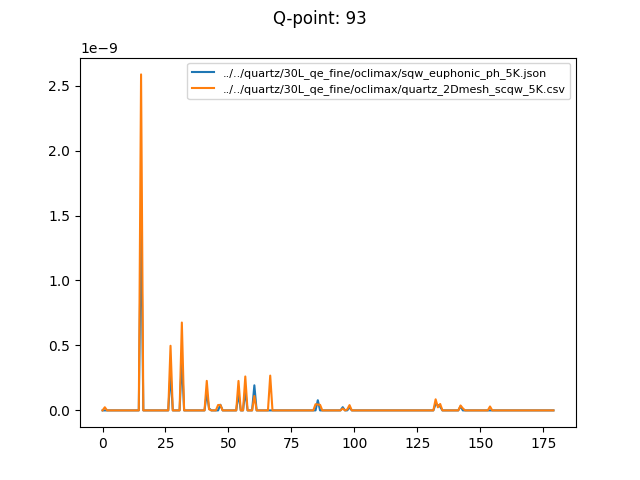

In [6]:
%matplotlib notebook
compare_sqw_main(['--sqw1', '../../quartz/30L_qe_fine/oclimax/sqw_euphonic_ph_5K.json',
                  '--sqw2', '../../quartz/30L_qe_fine/oclimax/quartz_2Dmesh_scqw_5K.csv', '--qpts', '93', '--mask-bragg'])

This has greatly improved the mean relative error, but it is still too high. The peak at ~3meV has reduced, but there are still other peaks that don't match e.g. at ~66.5 meV. This is again due to adjacent q-points.

Maybe different q-binning in OClimax will improve this? Instead of starting the q-axis at 0, start from -0.5\*bin_width, to try and get q-points in the middle of the bin. This has been done for `30L_qe` and the results have been written to `quartz/30L_qe/oclimax/quartz_2Dmesh_scqw_5K_qbin_center.csv`


Results for ../../quartz/30L_qe/oclimax/sqw_euphonic_ph_5K.json ../../quartz/30L_qe/oclimax/quartz_qbin_center_2Dmesh_scqw_5K.csv
Absolute Error - mean: 3.6088188428942406e-10 max: 2.231181956643332e-08 min: 2.868606653291514e-15
Relative Error - mean: 0.6008048720106167 max: 4.254729176796924 min: 0.0002987328392247217


<IPython.core.display.Javascript object>


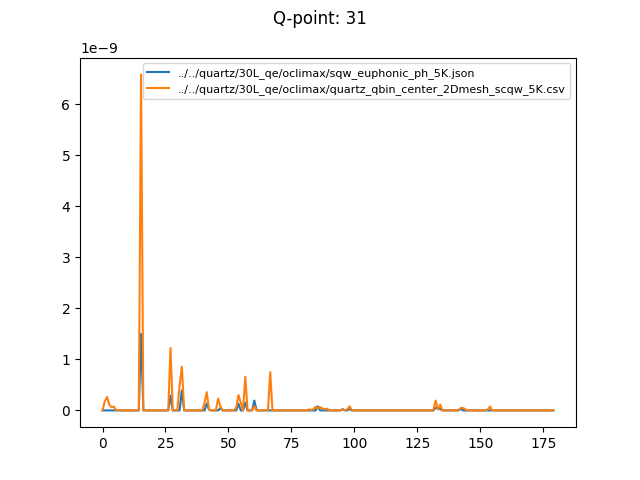

In [7]:
%matplotlib notebook
compare_sqw_main(['--sqw1', '../../quartz/30L_qe/oclimax/sqw_euphonic_ph_5K.json',
                  '--sqw2', '../../quartz/30L_qe/oclimax/quartz_qbin_center_2Dmesh_scqw_5K.csv', '--qpts', '31', '--mask-bragg'])

This hasn't really improved the results, and perhaps the OClimax binning is more complex than previously thought.

OClimax seems to be getting intensities from multiple q-points, even when effort is made to set the q-axes so there is only one point in each bin. There is a specific example of this in the `2ph_m4_0_qe_fine` cut:

[[  7.35067969  13.382244    14.07486487  16.87174307  21.69431329
   27.27967347  33.36265701  36.41712553  37.23923499  40.78078683
   48.70668811  49.56679489  52.43872469  53.87667495  58.69770243
   62.70340437  80.81805741  88.05027764  97.38029054 101.10897037
  101.30346327 132.36902784 134.10490494 134.55131848 142.53508876
  144.7877134  150.22477199]
 [  7.26188431  12.97328721  13.71468519  16.8456005   21.62750093
   27.16653355  33.10813246  36.44979586  37.33745416  40.76905136
   48.92630479  49.55870417  52.33919513  54.02510561  58.79339877
   62.68675615  80.9862085   87.99391281  97.24762385 101.10950214
  101.27970058 132.37584548 134.09771113 134.56020232 142.53494122
  144.65329432 150.39313696]]

Results for ../../quartz/2ph_m4_0_qe_fine/oclimax/sqw_euphonic_ph_5K.json ../../quartz/2ph_m4_0_qe_fine/oclimax/quartz_2Dmesh_scqw_5K.csv
Absolute Error - mean: 1.0352411473392213e-10 max: 1.8397477916575827e-08 min: 2.0885705660327276e-16
Relative Error - mean: 0.24666

<IPython.core.display.Javascript object>


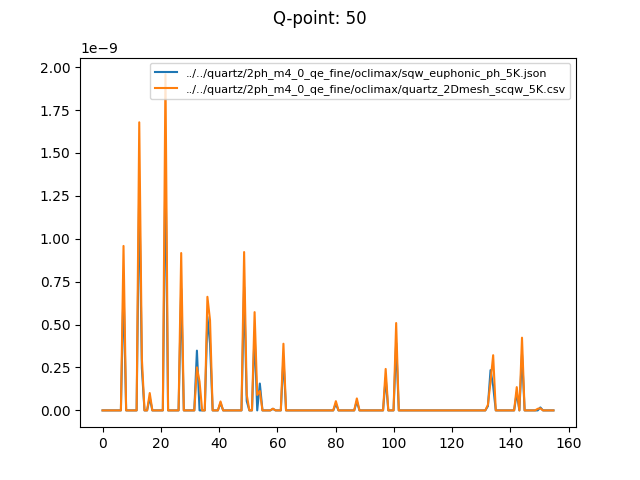

In [34]:
%matplotlib notebook
from compare_sf import get_sf

sf, freqs, qpts = get_sf('../../quartz/2ph_m4_0_qe_fine/euphonic/sf_phonons_5K.json')
print(freqs[49:51])

compare_sqw_main(['--sqw1', '../../quartz/2ph_m4_0_qe_fine/oclimax/sqw_euphonic_ph_5K.json',
                  '--sqw2', '../../quartz/2ph_m4_0_qe_fine/oclimax/quartz_2Dmesh_scqw_5K.csv', '--qpts', '50', '--mask-bragg'])

Looking closely at the peak at ~54 meV, in Euphonic there is a single peak, whereas in OClimax it is spread across 2 bins. The bin edges in this area are 53.1 - 54 -54.9 meV. It just so happens that q-point 50 has a mode at 54.02 meV, and q-point 49 has a mode at 53.88 meV so they would be put in different bins. This suggests that OClimax is using information from both q-points 49 and 50, whereas Euphonic is only using information from q-point 50 so this would explain the discrepancy. This also explains why the error is slightly less when finer q-points are used, as there is less variation in q-points.

Despite this variation, the q-points from one of the 'old' Quartz cuts (made for the previous quartz experimental dataset) actually produces a fairly good comparison, with errors of only ~1%

**Quartz 0510**
![quartz_0510](images/quartz_0510.PNG)


Results for ../../quartz/0510_cut/oclimax/sqw_euphonic_ph_5K.json ../../quartz/0510_cut/oclimax/quartz_2Dmesh_scqw_5K.csv
Absolute Error - mean: 2.9887286037661666e-12 max: 6.016718187574956e-11 min: 5.0870605257043094e-17
Relative Error - mean: 0.010255922386537834 max: 0.27425500358715216 min: 5.118228963628466e-07


<IPython.core.display.Javascript object>


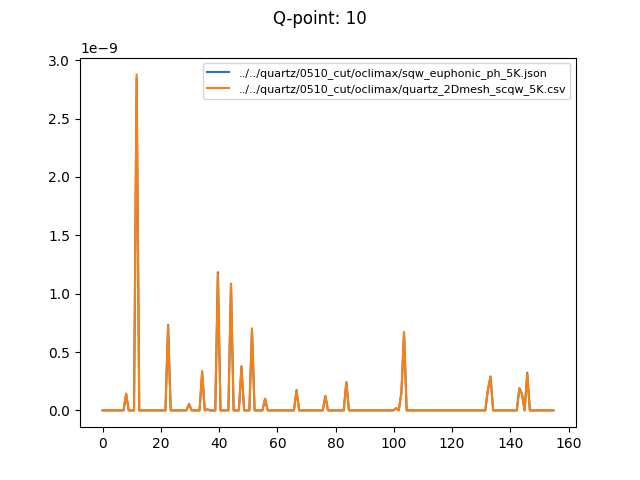

<IPython.core.display.Javascript object>


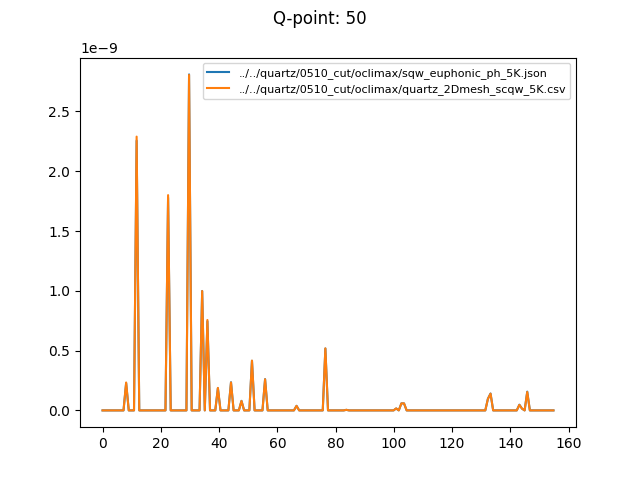

<IPython.core.display.Javascript object>


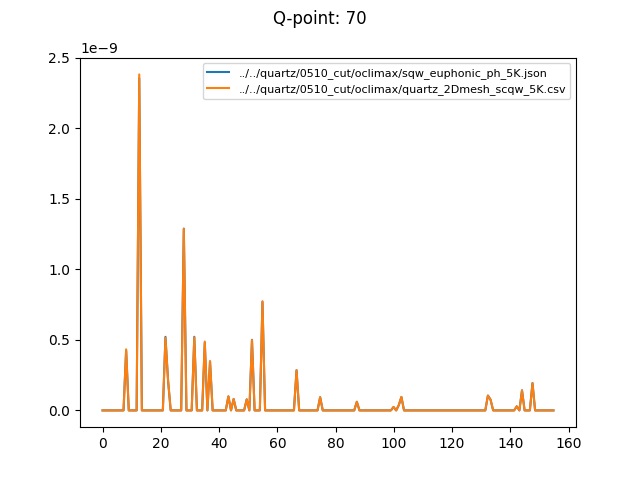

In [35]:
compare_sqw_main(['--sqw1', '../../quartz/0510_cut/oclimax/sqw_euphonic_ph_5K.json',
                  '--sqw2', '../../quartz/0510_cut/oclimax/quartz_2Dmesh_scqw_5K.csv', '--qpts', '10,50,70'])

It's also possible to get good agreement with an 'old' LZO cut, which has a mean error of only 1.5%

**LZO 011**
![lzo_011](images/lzo_011.PNG)


Results for ../../lzo/011_cut/oclimax/sqw_euphonic_ph_300K.json ../../lzo/011_cut/oclimax/La2Zr2O7_2Dmesh_scqw_300K.csv
Absolute Error - mean: 1.9641290941461502e-11 max: 2.6450053764999562e-08 min: 4.678091905296007e-23
Relative Error - mean: 0.014981958788268754 max: 1.7756015087496662 min: 1.2955456315147744e-07


<IPython.core.display.Javascript object>


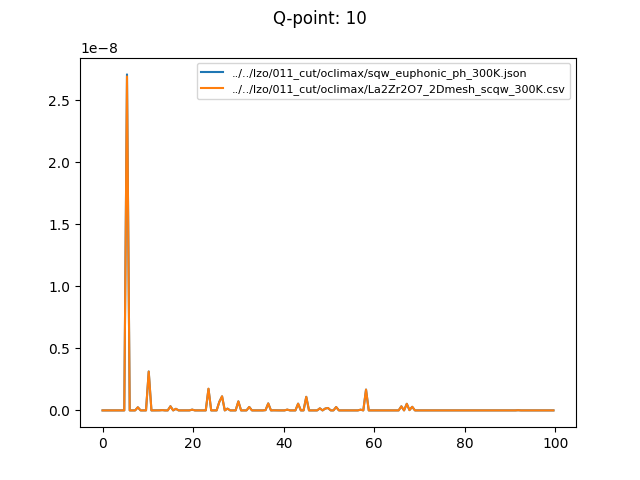

<IPython.core.display.Javascript object>


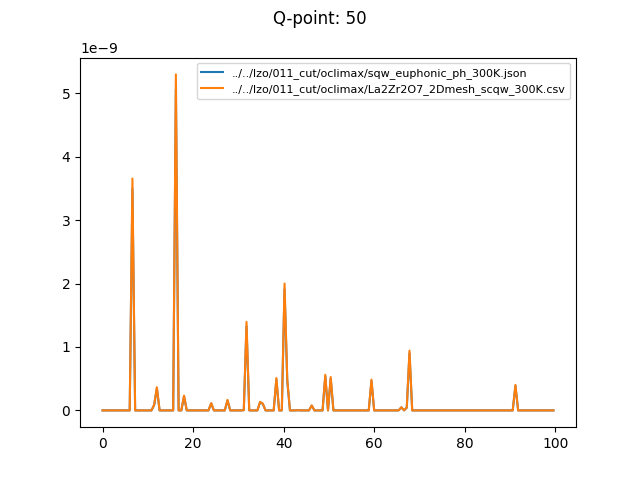

<IPython.core.display.Javascript object>


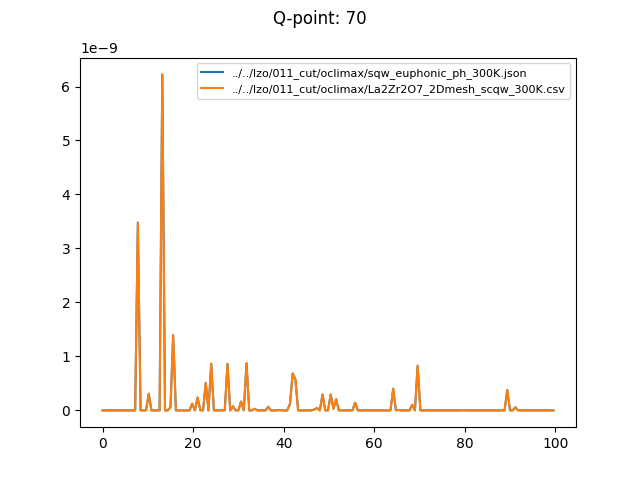

In [14]:
compare_sqw_main(['--sqw1', '../../lzo/011_cut/oclimax/sqw_euphonic_ph_300K.json',
                  '--sqw2', '../../lzo/011_cut/oclimax/La2Zr2O7_2Dmesh_scqw_300K.csv', '--qpts', '10,50,70', '--mask-bragg'])

It's not exactly clear why this is the case, possible reasons could include:

 - Finer q-binning
 - Less dispersion
 - Fewer gamma points (where dispersion will be greater and there will also be greater chance of numerical instability)
 
 However, these don't necessarily distinguish these 'old' cuts from the other cuts in all cases for both LZO and Quartz.

#### Comparing with eigenvalues/vectors interpolated from .castep_bin

The `sqw_euphonic_ph_5K.json` files contain Euphonic S(Q,w) calculated with frequencies read from a `.phonon` file, but to test Euphonic's interpolation we'll now read from `sqw_euphonic_5K.json` files which have been calculated with frequencies interpolated from a force constants matrix from a .castep_bin.

In [37]:
from compare_sf import main as compare_sf_main
from compare_sqw import main as compare_sqw_main


quartz_cuts = ['2ph_m4_0_qe', '30L_qe']
for cut in quartz_cuts:
    compare_sqw_main(['--sqw1', '../../quartz/' + cut + '/oclimax/sqw_euphonic_5K.json',
                      '--sqw2', '../../quartz/' + cut + '/oclimax/quartz_2Dmesh_scqw_5K.csv',
                      '--mask-bragg'])

lzo_cuts = ['kagome_qe', 'hh2_qe']
for cut in lzo_cuts:
    compare_sqw_main(['--sqw1', '../../lzo/' + cut + '/oclimax/sqw_euphonic_300K.json',
                      '--sqw2', '../../lzo/' + cut + '/oclimax/La2Zr2O7_2Dmesh_scqw_300K.csv',
                      '--mask-bragg'])


Results for ../../quartz/2ph_m4_0_qe/oclimax/sqw_euphonic_5K.json ../../quartz/2ph_m4_0_qe/oclimax/quartz_2Dmesh_scqw_5K.csv
Absolute Error - mean: 1.6984157145966232e-10 max: 1.0335470494524533e-08 min: 2.0936322508944685e-15
Relative Error - mean: 0.3565568404616344 max: 0.9968245650804285 min: 0.0004261268893322748

Results for ../../quartz/30L_qe/oclimax/sqw_euphonic_5K.json ../../quartz/30L_qe/oclimax/quartz_2Dmesh_scqw_5K.csv
Absolute Error - mean: 3.5209077376885996e-10 max: 2.2029038660498247e-08 min: 4.602706230989485e-15
Relative Error - mean: 0.609358593312647 max: 1.6304810505936185 min: 0.0028900368135021293

Results for ../../lzo/kagome_qe/oclimax/sqw_euphonic_300K.json ../../lzo/kagome_qe/oclimax/La2Zr2O7_2Dmesh_scqw_300K.csv
Absolute Error - mean: 8.928869329991109e-10 max: 1.5703977730577506e-08 min: 2.4098460777116654e-15
Relative Error - mean: 0.3193004582837292 max: 2.4132028244810164 min: 0.00020235279483238385

Results for ../../lzo/hh2_qe/oclimax/sqw_euphonic_30

In [38]:
compare_sqw_main(['--sqw1', '../../quartz/0510_cut/oclimax/sqw_euphonic_5K.json',
                  '--sqw2', '../../quartz/0510_cut/oclimax/quartz_2Dmesh_scqw_5K.csv', '--mask-bragg'])


Results for ../../quartz/0510_cut/oclimax/sqw_euphonic_5K.json ../../quartz/0510_cut/oclimax/quartz_2Dmesh_scqw_5K.csv
Absolute Error - mean: 5.143607043591983e-12 max: 1.4954365103836816e-09 min: 9.358241105027658e-17
Relative Error - mean: 0.01360895440557129 max: 0.9868242530873046 min: 2.5429718516208422e-06


In [40]:
compare_sqw_main(['--sqw1', '../../lzo/011_cut/oclimax/sqw_euphonic_300K.json',
                  '--sqw2', '../../lzo/011_cut/oclimax/La2Zr2O7_2Dmesh_scqw_300K.csv', '--mask-bragg'])


Results for ../../lzo/011_cut/oclimax/sqw_euphonic_300K.json ../../lzo/011_cut/oclimax/La2Zr2O7_2Dmesh_scqw_300K.csv
Absolute Error - mean: 2.0366781807497126e-11 max: 2.804971340151459e-08 min: 9.191974147189332e-22
Relative Error - mean: 0.02381341666258632 max: 8.396917353991958 min: 2.8195590849101185e-08


This produces similar results to those seen when reading directly from a `.phonon` file

### Summary

Initial comparisons of OClimax and Euphonic's S(Q,w) show mean relative errors of 60% or more for both Quartz and LZO, this has been determined to be largely due to differences in q-binning. Euphonic calculates the S(Q,w) per q-point, but OClimax requires q-bins as input, effort has been made to set up the bins in OClimax so that there is only 1 q-point per bin to get the closest similarity to Euphonic, however it appears that adjacent q-points always have an effect. Having 3x finer q-points for the `30L_qe` cut has reduced the error from 60% to 40% as the variation between q-points is less, but there are still cases where adjacent q-point frequencies cause there to be a peak in OClimax where none exists in Euphonic, increasing the error. However, some 'old' cuts for Quartz and LZO show good agreement of ~1.5%, it's not exactly clear why this is the case, but it could be due to either finer binning, less dispersion, or fewer gamma points in the 'old' cuts. Despite the mean relative error being so high, by eye the agreement between cuts seems good enough, and given that OClimax seems to be using information from adjacent q-points, this difference is probably acceptable and due to a difference in method rather than an inherent error in OClimax or Euphonic.